# **Customer Churn Analysis**

## Exploratory Data Analysis of Customer Churn

Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as tick
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('data/CustomerChurn.csv')

In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
df.shape

(7043, 21)

In [51]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [53]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior citizen is a categorical feature so we can ignore that, so the distribution is not proper.  

The average tenure of a customer if 32 months, and about 75% of the customers have tenure of less than or equal 55 months, the maximum tenure is 72 months.  

The average monthly charges paid by the customer is about $64.8 USD, and about 25% of the customers pay more that $90 USD.

In [54]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

/var/folders/l1/kcfsdr451n98nd8gxcg2bzgw0000gn/T/ipykernel_52995/1627087593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


Text(0.5, 1.0, 'Customer count for the target variable (Churn)')

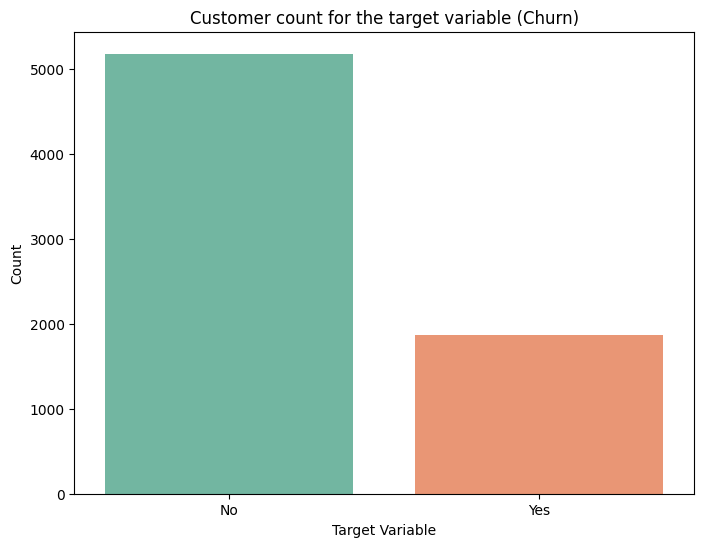

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.xlabel("Target Variable")
plt.ylabel("Count")
plt.title("Customer count for the target variable (Churn)")

In [56]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

The churn rate is about 27% which is concerning let's identify more patterns for this churn rate and also look for more insights.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
new_df = df.copy()

In [59]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors='coerce')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As the TotalCharges feature was of object type which is not the correct way of handling it, we converted it to the float type and now we have encountered 11 null values which we will handle by deleting those record as it is very less amount of missing data.

In [61]:
new_df.dropna(how='any', inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [62]:
print(f"Tenure\nMin:{df['tenure'].min()}\nMax:{df['tenure'].max()}")

Tenure
Min:0
Max:72


In [63]:
labels = ['0-18', '19-36', '37-54', '55-72']
bins = [0,18, 36, 54, 73]

new_df['tenure_group'] = pd.cut(x=df['tenure'],bins=bins ,labels=labels, right=False)

In [64]:
new_df['tenure_group'].value_counts()

tenure_group
0-18     2626
55-72    1887
19-36    1355
37-54    1164
Name: count, dtype: int64

In [65]:
new_df.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)
new_df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype=object)

Text(0.5, 1.0, 'Customer count for the Gender')

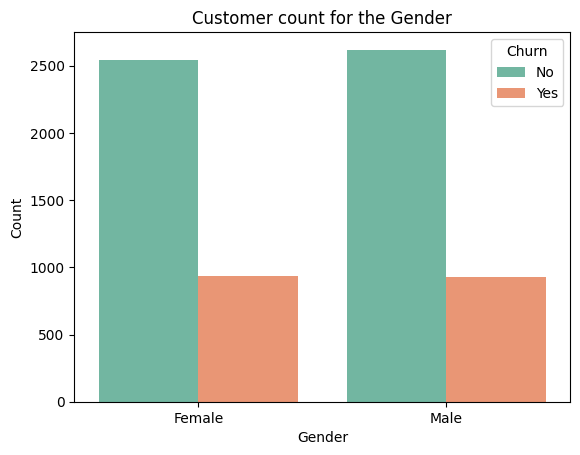

In [66]:
plt.figure()
sns.countplot(data=new_df, x='gender',hue='Churn', palette='Set2')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Customer count for the Gender")

The ratio of churn in females is about 26% and in the males it is 25.71 ~ 26%. So no meaningful insight gathered.

Text(0.5, 1.0, 'Customer count for the Senior Citizen')

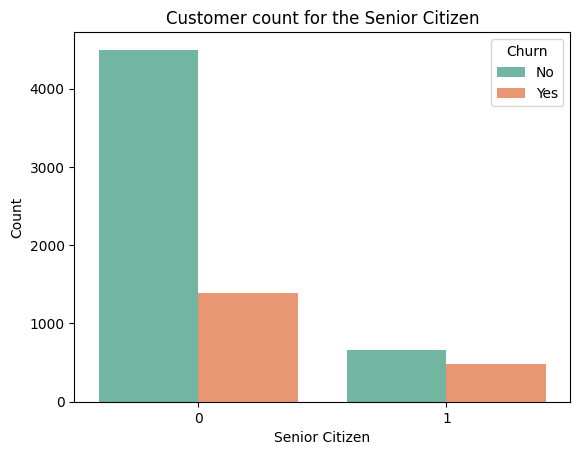

In [67]:
plt.figure()
sns.countplot(data=new_df, x='SeniorCitizen',hue='Churn', palette='Set2')
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.title("Customer count for the Senior Citizen")

The ratio of the churn for non senior-citizen customers is 25% and for the senior-citizen it is 41.68 ~ 47% this, we can say that the **senior citizen customers are more likely to churn**.

Text(0.5, 1.0, 'Customer count for the Partner Status')

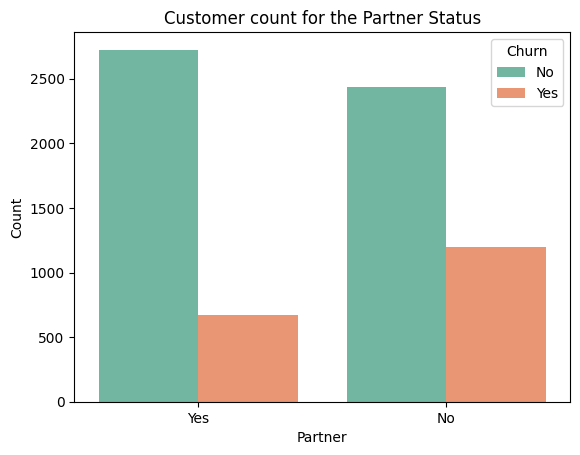

In [68]:
plt.figure()
sns.countplot(data=new_df, x='Partner',hue='Churn', palette='Set2')
plt.xlabel("Partner")
plt.ylabel("Count")
plt.title("Customer count for the Partner Status")

The ratio of the churn for customers having partners is 19% and for the customers wiht no partner is 32.9 ~ 33% this, we can say that the **customers with no partners are more likely to churn**.

In [69]:
new_df.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer count for the Contract')

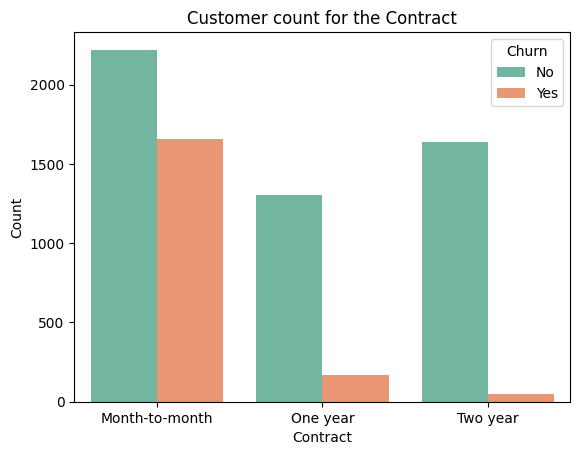

In [70]:
plt.figure()
sns.countplot(data=new_df, x='Contract',hue='Churn', palette='Set2')
plt.xlabel("Contract")
plt.ylabel("Count")
plt.title("Customer count for the Contract")

The ratio of the churn for customers having month-to-month contract is 42%, for the customers with one year contract is 11% and for the customers with two year contract is 2.8 , we can say that the **customers with monthly contracts are more likely to churn**.

Text(0.5, 1.0, 'Customer count for tenure group who churned')

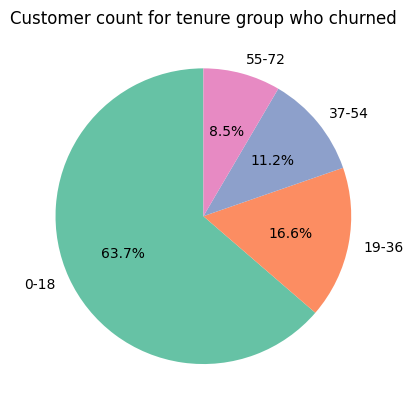

In [71]:
labels = new_df[new_df['Churn'] == 'Yes']['tenure_group'].value_counts().sort_index().index
colors = sns.color_palette('Set2')
plt.figure()
plt.pie(x=new_df[new_df['Churn'] == 'Yes']['tenure_group'].value_counts().sort_index(), labels=labels,autopct="%1.1f%%", startangle=90,colors=colors )
plt.title("Customer count for tenure group who churned")

The highest number of customers who churn are mostly in the tenure group of 0-18 months with about 64%. **So we can say that that the customers churn more in intial months**.

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

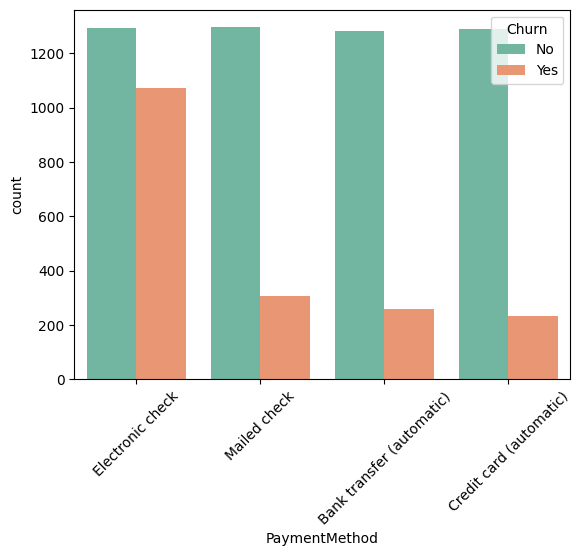

In [72]:
plt.figure()    
sns.countplot(data=new_df, x='PaymentMethod', hue='Churn', palette='Set2')
plt.xticks(rotation=45)

The customers who pay with electronic checks are mor likely to churn.

In [73]:
new_df['Churn'] = np.where(new_df.Churn == 'Yes', 1, 0)

In [74]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-18
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,19-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-18
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-54
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-18


In [75]:
new_df_dummies = pd.get_dummies(new_df, drop_first=True)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_19-36,tenure_group_37-54,tenure_group_55-72
0,0,29.85,29.85,0,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
1,0,56.95,1889.50,0,True,False,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,53.85,108.15,1,True,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,0,42.30,1840.75,0,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,0,70.70,151.65,1,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False


/Users/adityakumbhar/Developer/Customer_Churn_Analysis/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/adityakumbhar/Developer/Customer_Churn_Analysis/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/adityakumbhar/Developer/Customer_Churn_Analysis/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())
/Users/adityakumbhar/Developer/Customer_Churn_Analysis/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/adityakumbhar/Developer/Customer_Churn_Analysis/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj()

Text(0.5, 1.0, 'Monthly charges by churn')

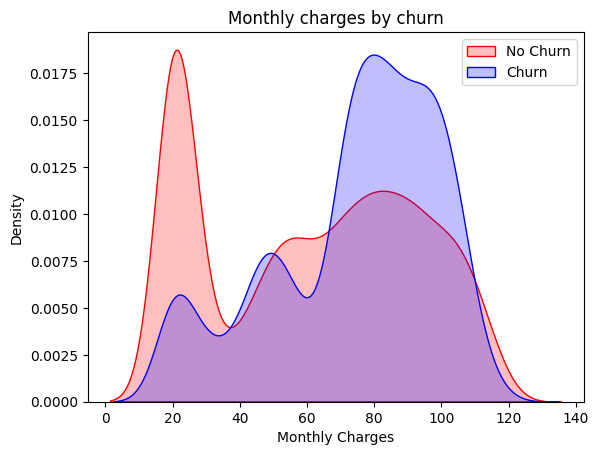

In [76]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[new_df_dummies['Churn'] == 0], color='red', fill=True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[new_df_dummies['Churn'] == 1], color='blue' , fill= True)

Mth.legend(['No Churn', 'Churn'])
Mth.set_xlabel("Monthly Charges")
Mth.set_ylabel("Density")
Mth.set_title("Monthly charges by churn")

The churn rate is high where monthly charges are high and churn is low where the monthly charges are low.

/Users/adityakumbhar/Developer/Customer_Churn_Analysis/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/adityakumbhar/Developer/Customer_Churn_Analysis/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/adityakumbhar/Developer/Customer_Churn_Analysis/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())
/Users/adityakumbhar/Developer/Customer_Churn_Analysis/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/adityakumbhar/Developer/Customer_Churn_Analysis/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj()

Text(0.5, 1.0, 'Total charges by churn')

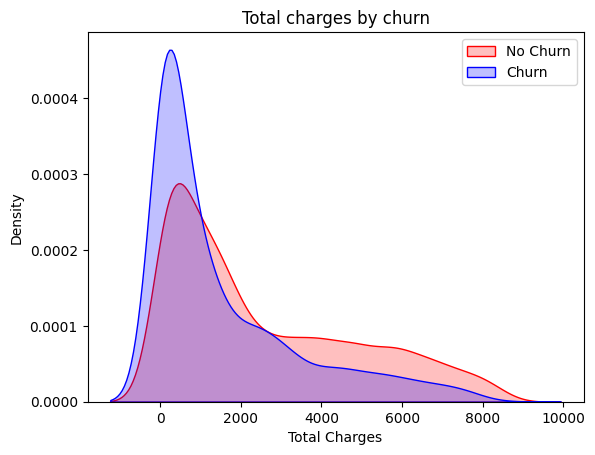

In [77]:
Mth = sns.kdeplot(new_df_dummies.TotalCharges[new_df_dummies['Churn'] == 0], color='red', fill=True)
Mth = sns.kdeplot(new_df_dummies.TotalCharges[new_df_dummies['Churn'] == 1], color='blue' , fill= True)

Mth.legend(['No Churn', 'Churn'])
Mth.set_xlabel("Total Charges")
Mth.set_ylabel("Density")
Mth.set_title("Total charges by churn")

The churn is high when the total charges are low. But to get a clear picture we need to consider all three parameters like when the tenure is less, the monthly charges are high and the total charges are less then it is more likely to churn.

<Axes: >

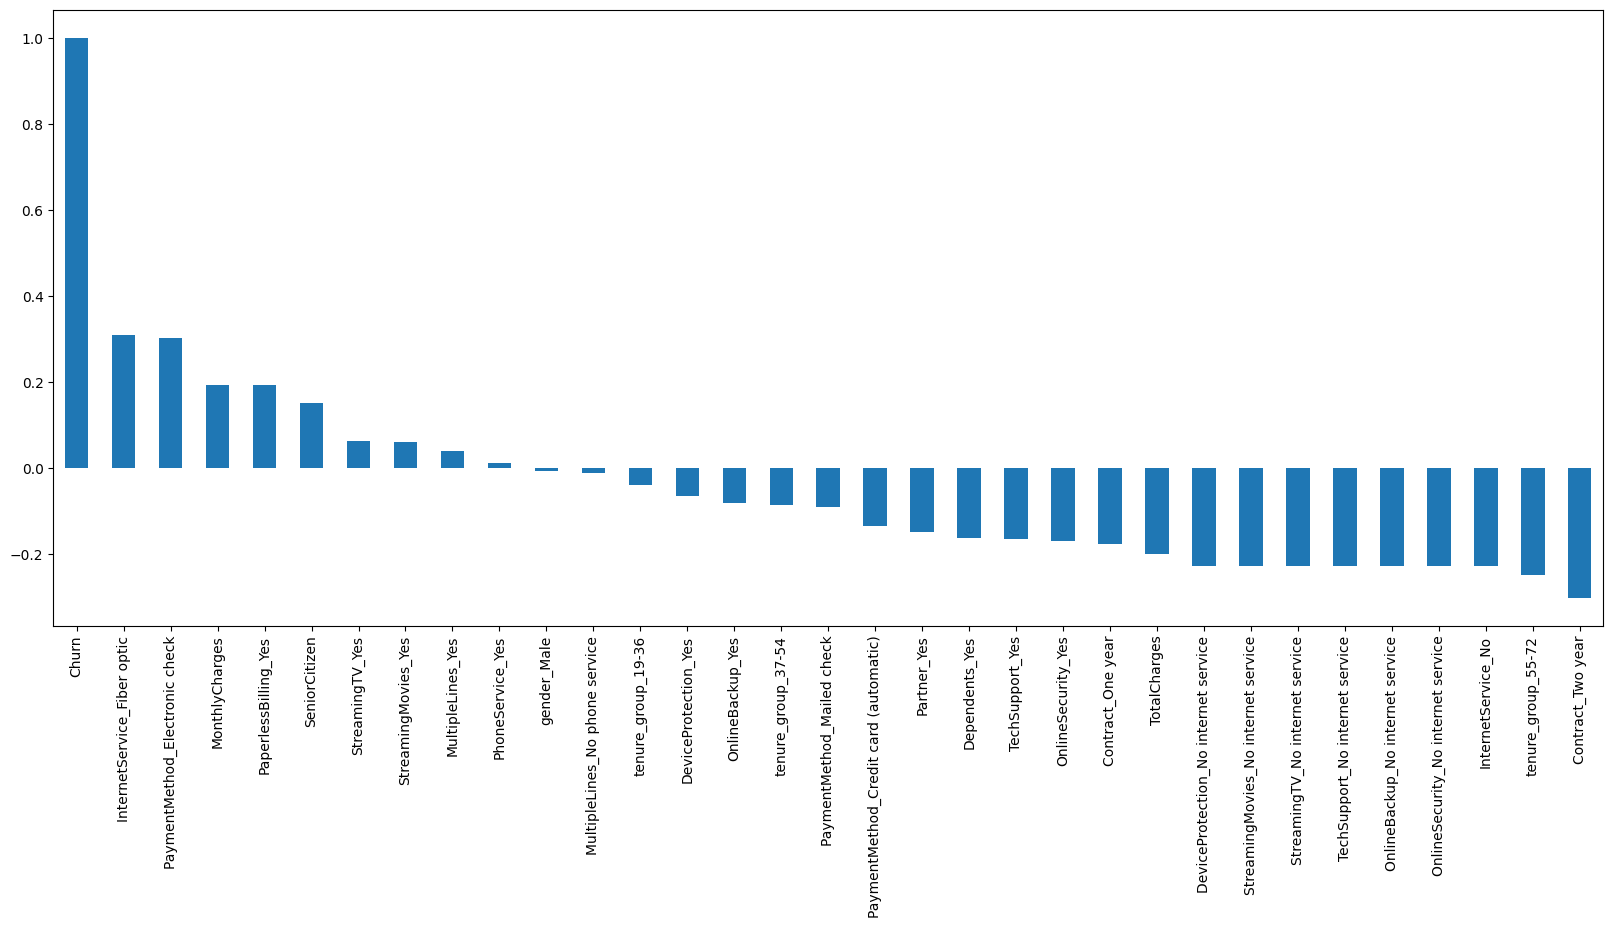

In [78]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

HIGH churn can be seen in the customers with high monthly charges, Electronic check payment method, Senior Citizens, etc.  

LOW churn can be seen in the customers with tenure of more than 4 years, one to two year contracts, Streaming movies, Streaming TV.